## Etivity 2 - Data preparation & Can we learn?

### Student Id: 18203485 

### Student Name : Fergus Mc Hale

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import percentile
import random
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import FactorAnalysis

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC 
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import re

import pandas as pd
import seaborn as sns
from sklearn.preprocessing import Imputer
from sklearn.metrics import classification_report, confusion_matrix
import scipy.stats as stats
import math


%matplotlib inline

In [2]:
CSV_SPLIT = ','
MAX_ITERATIONS = 10

# Task 1

# Fill-in the missing values in the bank dataset. Use the EDA techniques from E-tivity 1 to decide how to fill in missing values. In your notebook, explain shortly (max 250 words) the decisions you have taken.

In [3]:
data = pd.read_csv('./data/bank_et2.csv',sep=CSV_SPLIT, delimiter=None,index_col='Unnamed: 0') #For local Machine

In [4]:
dataset = data.values

In [5]:
data.apply(lambda x: sum(x.isnull()), axis=0)

age              12
job              10
marital           0
education       104
default           0
balance           0
ratio_bal_ln      0
ratio_ln_inc      0
housing           0
loan              0
contact         191
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome        454
subscribed        0
dtype: int64

In [6]:
imputer = Imputer(missing_values='NaN', strategy='mean')
imputer.fit(data['age'].values.reshape(-1, 1))
data['age'] = imputer.transform(data['age'].values.reshape(-1, 1))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [7]:
data['job'].fillna('unknown', inplace=True)

In [8]:
data['education'].fillna('unknown', inplace=True)

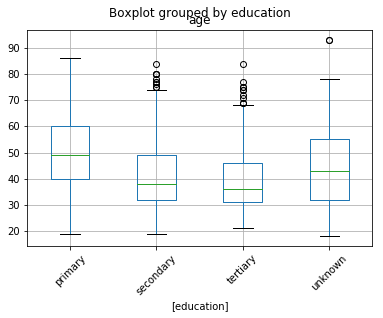

In [9]:
data.boxplot(column='age', by=['education'], rot=45)

In [10]:
data['contact'].value_counts()

cellular     1663
telephone     146
Name: contact, dtype: int64

In [11]:
data['contact'].fillna('unknown', inplace=True)

In [12]:
data['poutcome'].value_counts()

failure    955
success    444
other      147
Name: poutcome, dtype: int64

In [13]:
data['poutcome'].fillna('other', inplace=True)

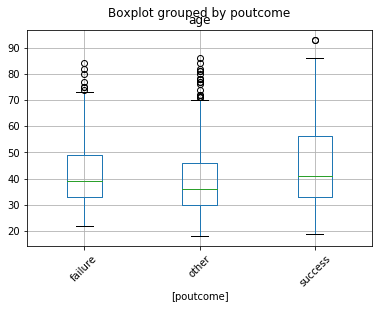

In [14]:
data.boxplot(column='age', by=['poutcome'], rot=45)

In [15]:
data.describe()

age       balance  ratio_bal_ln  ratio_ln_inc          day  \
count  2000.000000   2000.000000   2000.000000   2000.000000  2000.000000   
mean     41.753018   1413.663500      0.241951      0.485030    13.851500   
std      12.686108   3131.224213      0.821604      1.075543     9.712189   
min      18.000000   -980.000000     -2.632068     -2.851405     1.000000   
25%      32.000000    201.500000     -0.308018     -0.274181     5.000000   
50%      38.000000    551.000000      0.224099      0.487082    12.000000   
75%      50.000000   1644.500000      0.806315      1.211896    23.000000   
max      93.000000  81204.000000      2.961979      4.046914    31.000000   

          duration     campaign        pdays     previous  
count  2000.000000  2000.000000  2000.000000  2000.000000  
mean    292.020500     1.909500   167.896000     2.561500  
std     221.557295     1.378862   131.754126     3.400735  
min       7.000000     1.000000    -1.000000     0.000000  
25%     146.000000     1.000000    75.750000     1.000000  
50%     236.000000     1.000000   182.000000     2.000000  
75%     379.000000     2.000000   251.000000     3.000000  
max    1823.000000    11.000000   854.000000    55.000000

# Top 5

In [16]:
data.head(5)

age          job   marital  education default  balance  ratio_bal_ln  \
0  32.0   technician    single   tertiary      no      392      1.300134   
1  39.0   technician  divorced  secondary      no      688     -0.193701   
2  59.0      retired   married  secondary      no     1035      1.334266   
3  47.0  blue-collar   married  secondary      no      398      0.362286   
4  54.0      retired   married  secondary      no     1004      0.072075   

   ratio_ln_inc housing loan   contact  day month  duration  campaign  pdays  \
0      0.473895     yes   no  cellular    1   apr       957         2    131   
1      0.237021     yes  yes  cellular    1   apr       233         2    133   
2      0.121981     yes  yes  cellular    1   apr       126         2    239   
3      1.251328     yes  yes  cellular    1   apr       274         1    238   
4     -0.533738     yes   no  cellular    1   apr       479         1    307   

   previous poutcome subscribed  
0         2  failure         no  
1         1  failure         no  
2         1  failure         no  
3         2  failure         no  
4         1  failure         no

# Bottom 5

In [17]:
data.tail(5)

age           job  marital  education default  balance  ratio_bal_ln  \
1995  20.0       student   single    unknown      no     2785     -2.170524   
1996  28.0        admin.   single  secondary      no      127      0.811788   
1997  81.0       retired  married    primary      no     1154      0.504655   
1998  46.0      services  married    primary      no     4343     -0.965874   
1999  40.0  entrepreneur  married  secondary      no     6403     -0.800893   

      ratio_ln_inc housing loan    contact  day month  duration  campaign  \
1995      1.081071      no   no   cellular   16   sep       327         2   
1996      1.134496      no   no   cellular   16   sep      1334         2   
1997      0.042190      no   no  telephone   17   sep       231         1   
1998      0.302708     yes   no    unknown   20   sep       185         1   
1999      1.066659      no   no   cellular   22   sep       208         2   

      pdays  previous poutcome subscribed  
1995     -1         0    other        yes  
1996     -1         0    other        yes  
1997     -1         0    other        yes  
1998     -1         0    other        yes  
1999     -1         0    other        yes

# Recheck on empty fields

In [18]:
data.apply(lambda x: sum(x.isnull()), axis=0)

age             0
job             0
marital         0
education       0
default         0
balance         0
ratio_bal_ln    0
ratio_ln_inc    0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
subscribed      0
dtype: int64

# Task 1 Comment

The following were the missing values within the dataset
Inputer is being used on age column to fill in missing values
The following fields was replaced by unknown due not knowing any other ways to classify them other than in a new category

These fields are :

* job : 10 
* education : 104 
* contact : 191 
* poutcome : 454

There were other ways to approach this such as Deleting large number of rows where the NaN is present but this wouldnt make the dataset equal by droping those rows.
For a large number of numerical categories median could be used to fill in its missing values as a quick way to handle the column.
I chose to assign a unique category to job, education , contact , poutcome it will result in lower variance with one hot encoding and negates the loss of data as a new category has been added.
It inadvertanetly add variance to the data that may affect the performance of the chosen algorithm not unless KNN which can handle missing values.

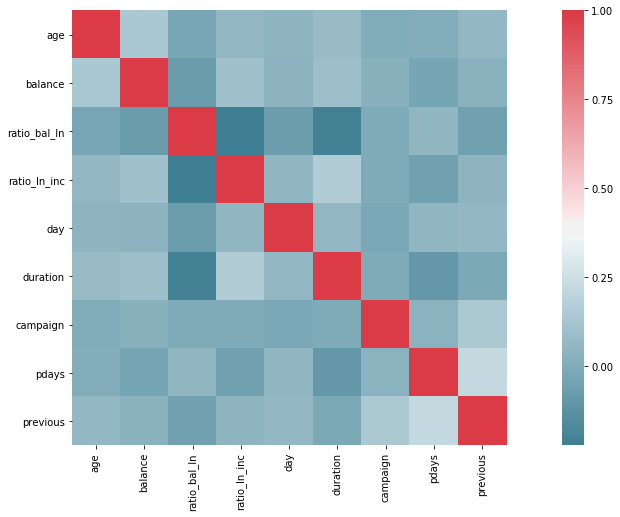

In [19]:
f, ax = plt.subplots(figsize=(20, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


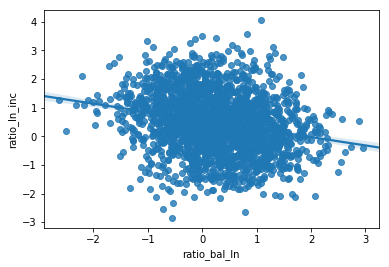

In [20]:
sns.regplot(x='ratio_bal_ln', y='ratio_ln_inc', data=data)

# Task 2

Decide on the treatment of outliers in the bank data set. If appropriate, remove examples with extreme or unexpected attribute values, apply log transformation to numeric attributes with extreme values. Use other methods, if appropriate, to treat outliers as well. In your notebook, explain shortly (max 250 words) the decisions you have taken.

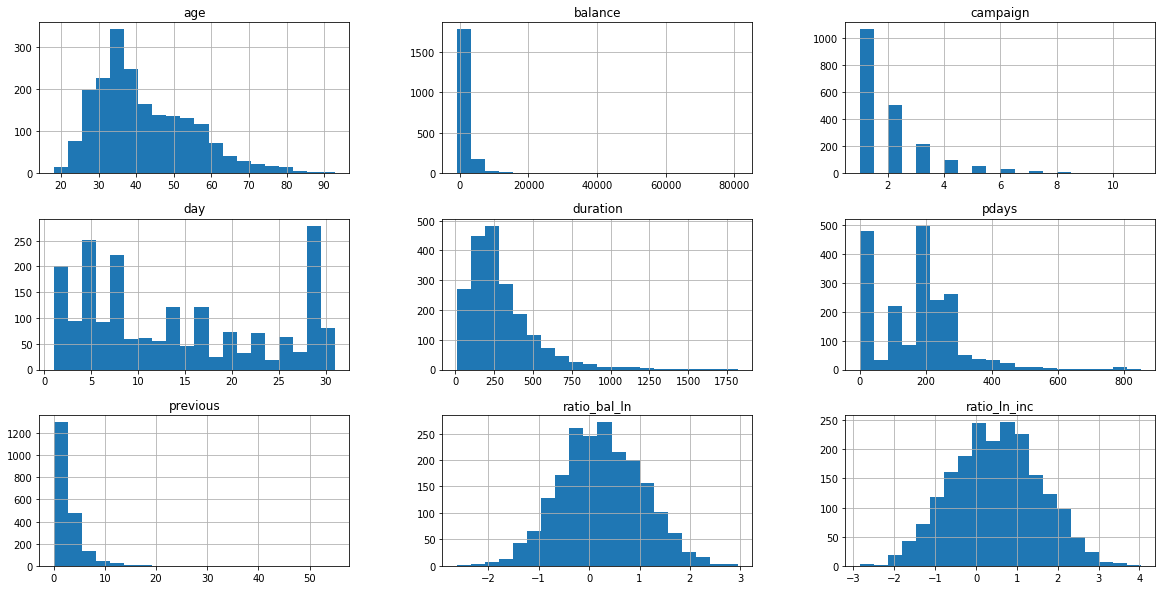

In [21]:
data.hist(figsize=(20,10), bins=20)
plt.show()

In [22]:
data['ratio_bal_ln_log'] = np.log(data['ratio_bal_ln'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


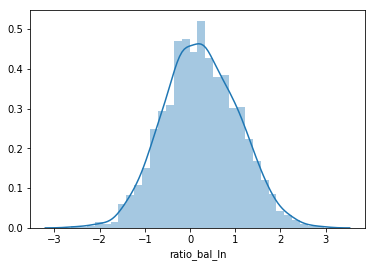

In [23]:
sns.distplot(data['ratio_bal_ln'])

In [24]:
numerical_columns = data.select_dtypes(include=['category', object]).columns

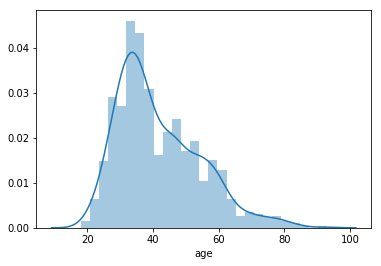

In [25]:
sns.distplot(data['age'])

In [26]:
data['age_log'] = np.log(data['age'])

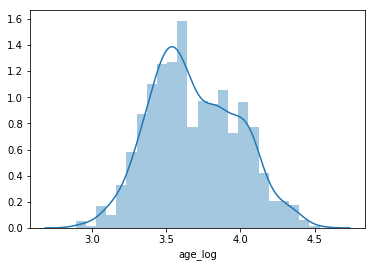

In [27]:
sns.distplot(data['age_log'])

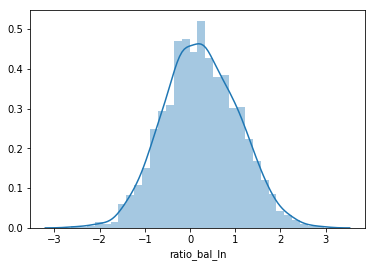

In [28]:
sns.distplot(data['ratio_bal_ln'])

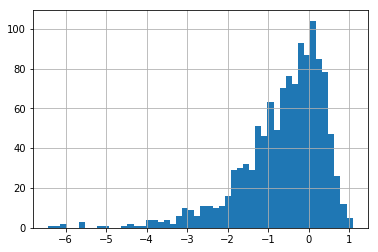

In [29]:
data['ratio_bal_ln_log'].hist(bins=50)

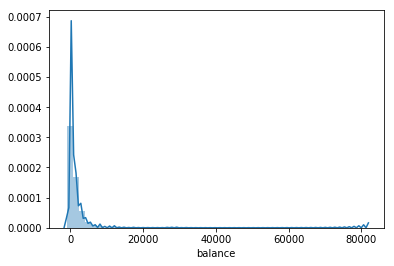

In [30]:
sns.distplot(data['balance'])

As seen from the distribution plot above there is one outliner of 80000 in the entire distribution.This cannot be removed as in every society there is individuals of different wealth brackets this dataset shows only one 

In [31]:
data['balance'].min()

-980

The minimum balance is negative so in order to make this an even distribution this needs to be counteracted on the row by adding an extra 20 to the row which creates a more even distribution

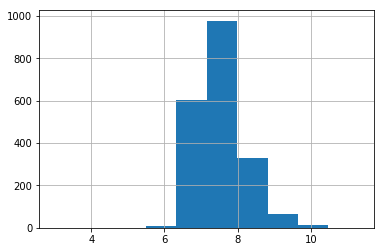

In [32]:
data["balance_positive"] = data["balance"] + 1000
data['balance_positive'].apply(np.log).hist()
plt.show()

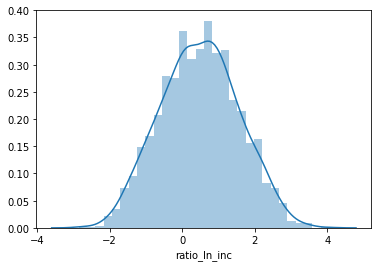

In [33]:
sns.distplot(data['ratio_ln_inc'])

In [34]:
data['ratio_ln_inc_log'] = np.log(data['ratio_ln_inc'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


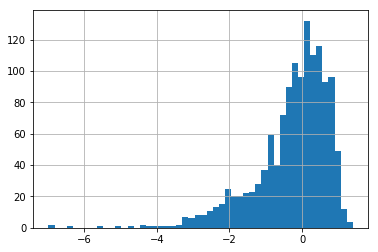

In [35]:
data['ratio_ln_inc_log'].hist(bins=50)

In [36]:
cols_to_transform = data.select_dtypes(include=['category', object]).columns

In [37]:
data_with_dummies = pd.get_dummies(data,columns=cols_to_transform)

# Job vs Education

In [38]:
education_by_job = pd.crosstab(data['education'], data['job']).idxmax(axis=0)

In [39]:
print(education_by_job)

job
admin.           secondary
blue-collar      secondary
entrepreneur      tertiary
housemaid          primary
management        tertiary
retired          secondary
self-employed     tertiary
services         secondary
student          secondary
technician       secondary
unemployed       secondary
unknown            unknown
dtype: object


Interquatile Range

In [40]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

Z Score

In [41]:
def outliers_z_score(ys):
    threshold = 3
    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.where(np.abs(z_scores) > threshold)

In [42]:
ratio_bal_in_outliners = outliers_iqr(data['ratio_bal_ln'])

In [43]:
print(ratio_bal_in_outliners)

(array([  34,   67,  194,  220,  344,  882,  946, 1010, 1232, 1398, 1714,
       1863, 1884, 1975, 1995], dtype=int64),)


In [44]:
ratio_ln_inc_outliners = outliers_iqr(data['ratio_ln_inc'])

In [45]:
print(ratio_bal_in_outliners)

(array([  34,   67,  194,  220,  344,  882,  946, 1010, 1232, 1398, 1714,
       1863, 1884, 1975, 1995], dtype=int64),)


In [46]:
print(ratio_ln_inc_outliners)

(array([ 687,  732,  819, 1112, 1308, 1550], dtype=int64),)


In [47]:
balance_outliners = outliers_z_score(data['balance'])

In [48]:
print(balance_outliners)

(array([   9,   59,  227,  468,  498,  614,  659, 1004, 1010, 1020, 1033,
       1057, 1088, 1106, 1212, 1273, 1328, 1374, 1390, 1422, 1431, 1440,
       1471, 1551, 1634, 1657, 1790, 1802, 1834], dtype=int64),)


In [49]:
data_with_dummies.fillna(0, inplace=True)

Scaling or Standardization

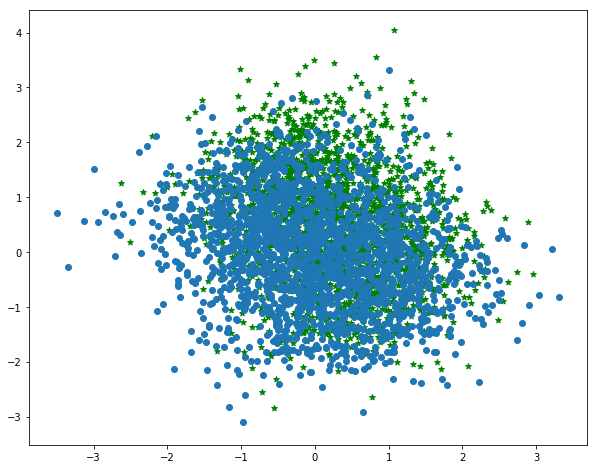

In [50]:
plt.figure(figsize=(10,8))
X = data[['ratio_bal_ln', 'ratio_ln_inc']]
std_scale = preprocessing.StandardScaler().fit(X)
data_std = std_scale.transform(X)
plt.scatter(X['ratio_bal_ln'], X['ratio_ln_inc'],color="green", marker='*')
plt.scatter(data_std[:,0], data_std[:,1])

Image shows the difference is variables between variables that have been scaled(blue) and not scaled(green)

It assumes your data conforms to a normal distribution

In [51]:
X_scaled = preprocessing.scale(X)
print("\nAFTER:")
print("Mean =", X_scaled.mean(axis=0))
print("Std deviation =", X_scaled.std(axis=0))


AFTER:
Mean = [-2.84217094e-17  2.84217094e-17]
Std deviation = [1. 1.]


Normalisation L1 L2

Is a scaling technique that doesnt assume any specific distribution

In [52]:
X_l1 = preprocessing.normalize(X, norm='l1')
X_l2 = preprocessing.normalize(X, norm='l2')
print("\nL1 normalized data:\n", X_l1[X_l1 != 0.])
print("\nL2 normalized data:\n", X_l2[X_l2 != 0.])


L1 normalized data:
 [ 0.73287078  0.26712922 -0.44971257 ...  0.23861941 -0.42884652
  0.57115348]

L2 normalized data:
 [ 0.93953345  0.34245714 -0.63279721 ...  0.29906041 -0.60043129
  0.79967635]


 # Task 2 Comment

There are many approaches to outlines such as :

* Data Log
* Interquartile Range(IQR)
* Z Score
* Scaling
* Normalisation

A log was performed to on ratio_bal_ln , ratio_ln_inc , age , balance this allows a more even gaussian graph to be created allowing for easier learning
The other approaches are IQR, Z Score that allow the outliners to be discovered given a certain range of 25/75 to then finding their lower bounds of the data
The z score is another approach to this that applies a mean and standard deviation and takes away the values
The log was performed to create a more even gaussian distribution of the values.
I didnt see a need to remove outliners early on see a better use to use PCA or Factor Analysis to identify key components necessary for prediction. Its better to have enough data to make a prediction than data you accidently deleted through outliner detection just from experience working with data previously in migration form

# Task 3

Suggest the creation of at least one new feature from the existing ones and justify the usefulness of your choice within the context of the 2-class classification problem you have defined in E-tivity 1.

In [53]:
data['mean_ratio_bal_In_inc'] = data[['ratio_ln_inc_log','ratio_bal_ln_log']].mean(axis=1)

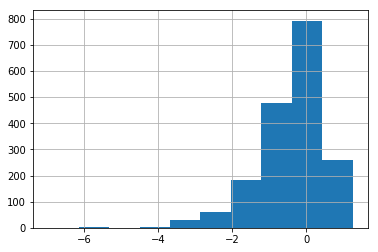

In [54]:
data['mean_ratio_bal_In_inc'].hist()

# Ages per group

In [55]:
age_group_names = ['young', 'lower middle', 'middle-aged', 'old']

data['age_binned'] = pd.qcut(data['age'], 4, labels = age_group_names)
data['age_binned'].value_counts()

young           517
middle-aged     513
lower middle    486
old             484
Name: age_binned, dtype: int64

In [56]:
def merge_loan(data):    
    if (data['housing'] == 'yes') or (data['loan'] == 'yes'):
        return 1
    else:
        return 0

In [57]:
data['has_loan'] = data.apply(merge_loan, axis=1)

data.has_loan.value_counts()

1    1043
0     957
Name: has_loan, dtype: int64

# Financial Stablity
Individuals who have a house with no loan and a balance greater than 500

In [58]:
def Is_Financially_Stable(data):
    if (data['housing'] == 'yes') and (data['has_loan'] == 1) and (data['balance'] > 500):
        return 1
    else:
        return 0

In [59]:
data['Is_Financially_Stable'] = data.apply(Is_Financially_Stable, axis=1)

data.Is_Financially_Stable.value_counts()

0    1564
1     436
Name: Is_Financially_Stable, dtype: int64

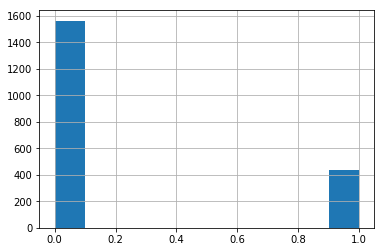

In [60]:
data['Is_Financially_Stable'].hist()

# Loan Repayablity
Is the loan repayable given the individual doesnt have a house and the balance is less than 500 and their age is greater than 50 with a loan and the duration of payment is greater than 5 days. It has identified 10 people in this risk category

In [61]:
def Is_Loan_Repayable(data):
    if (data['housing'] == 'no') and (data['balance'] < 500) and (data['age'] > 50) and (data['has_loan'] == 1) and (data['pdays'] > 7):
        return 1
    else:
        return 0

In [62]:
data['Is_Loan_Repayable'] = data.apply(Is_Loan_Repayable, axis=1)

data.Is_Loan_Repayable.value_counts()

0    1990
1      10
Name: Is_Loan_Repayable, dtype: int64

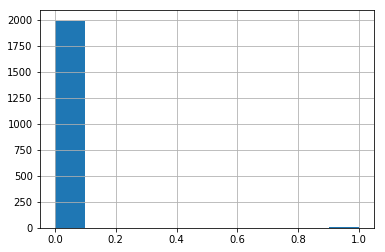

In [63]:
data['Is_Loan_Repayable'].hist()

# Task 3 Comment

The new feature above is the combined elements of ratio_ln_inc_log and ratio_bal_ln log which can now be used as an X variable instead of two features just to see how it will perform compared to two variables as X.
Other new categories created from suggestions age per group and has loan. From these came up with other categories such as Is_Financially_Stable and Is_Loan_Repayable. These two new categories could be used as a combined X variable to predict an unknown y if further correlations are found

# Task 4

Using the dataset you prepared, perform a classification on the data using scikitlearn’s logistic regression.

Generate plots of the approximate probability P[Ein-Eout|>e]. You can use the exact same approach as in E-tivity 1. In the same figure, plot the Hoeffding bound and the VC bound and check whether or not either bound is exceeded (indicate this clearly in a markdown cell).

In [64]:
data['subscribed_code'] = data['subscribed'].map({'yes': 1, 'no': 0})

Applying the same values(X,y) from Etivity 1

In [65]:
X = data[['ratio_bal_ln', 'ratio_ln_inc']].values
y = data['subscribed_code'].values

In [66]:
fa_one = FactorAnalysis(n_components = 2)
X1_pca = pca_data_one = fa_one.fit_transform(X,y)

In [67]:
X_shuffled, y_shuffled = shuffle(X1_pca, y, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=0.2)
print ("X_train.shape:{}, y_train.shape:{}".format(X_train.shape, y_train.shape))
print ("X_test.shape :{}, y_test.shape :{}".format(X_test.shape, y_test.shape))

X_train.shape:(1600, 2), y_train.shape:(1600,)
X_test.shape :(400, 2), y_test.shape :(400,)


Applying new features to help see can it make prediction better

In [68]:
X2 = data[['Is_Financially_Stable','Is_Loan_Repayable']].values
y2 = data['subscribed_code'].values

In [69]:
fa_two = FactorAnalysis(n_components = 2)
X2_pca = pca_data_two = fa_two.fit_transform(X2,y2)

In [70]:
X2_shuffled, y2_shuffled = shuffle(X2_pca, y2, random_state=0)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_shuffled, y2_shuffled, test_size=0.2)
print ("X_train.shape:{}, y_train.shape:{}".format(X_train.shape, y_train.shape))
print ("X_test.shape :{}, y_test.shape :{}".format(X_test.shape, y_test.shape))

X_train.shape:(1600, 2), y_train.shape:(1600,)
X_test.shape :(400, 2), y_test.shape :(400,)


# Logistic Regression

In [71]:
logistic_classifer = LogisticRegression()
logistic_classifer.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [72]:
logistic_classifer.predict(X_train)

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [73]:
logistic_classifer.predict_proba(X_train)

array([[0.92027365, 0.07972635],
       [0.14277297, 0.85722703],
       [0.95640984, 0.04359016],
       ...,
       [0.45025805, 0.54974195],
       [0.19440584, 0.80559416],
       [0.56084502, 0.43915498]])

In [74]:
Ein = 1 - logistic_classifer.score(X_train, y_train)
print("Ein:", Ein)

Eout = 1 - logistic_classifer.score(X_test, y_test)
print("Eout:", Eout)

Ein: 0.224375
Eout: 0.20999999999999996


In [75]:
y_train_hat = logistic_classifer.predict(X_train)

errors = 0
for i in range(len(y_train)):
    if(y_train_hat[i]!=y_train[i]):
        errors+=1

print(errors)
print(len(y_train))
print("Error Percentage",errors/len(y_train))

359
1600
Error Percentage 0.224375


In [76]:
y_test_hat = logistic_classifer.predict(X_test)

errors = 0
for i in range(len(y_test)):
    if(y_test_hat[i]!=y_test[i]):
        errors+=1

print(errors)
print(len(y_test))
print("Error Percentage",errors/len(y_test))

84
400
Error Percentage 0.21


In [77]:
Eins = []
Eouts = []

def run_experiment(counter):
    for i in range (counter):
        X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=0.2)

        Ein = 1 - logistic_classifer.score(X_train, y_train)
        Eout = 1 - logistic_classifer.score(X_test, y_test)
        Eins.append(Ein)
        Eouts.append(Eout)


run_experiment(1000)

In [78]:
def calc_prob_epsilon(M, Eins, Eouts, epsilons):
    prob_epsilon=[]
    for e in epsilons:   
        counter = 0
        for i in range(M):
            if abs(Eins[i] - Eouts[i])>e:
                   counter +=1
        prob_epsilon.append(counter/M)           
    return prob_epsilon

In [79]:
epsilons = np.arange(0, 1, 0.01)
error_in = [Ein]
error_out = [Eout]
prob_epsilon = calc_prob_epsilon(1, error_in, error_out, epsilons)

print("epsilon proba. dist:", prob_epsilon)

epsilon proba. dist: [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [80]:
epsilons = np.arange(0, 1, 0.01)
N=2000

In [81]:
tolerance = 0.01
dvc = 3
def get_vc_bound(N, dvc, tolerance, Ein):
    return Ein + math.sqrt((1/(2*N)) * math.log((2 * (math.pow(N,dvc) + 1)/tolerance) ))

print(get_vc_bound(N, dvc, tolerance, Ein))

0.3081918013367536


In [82]:
def plot(error_in,error_out):
    error_diff = abs(np.array(error_in)-np.array(error_out))
    epsilons = np.arange(0.001,0.20,0.001)
    prob_epsilon=[]
    for e in epsilons:
        prob_epsilon.append(len([1 for i in error_diff if i > e])/len(error_diff))
    plt.plot(epsilons, prob_epsilon)

    hoef = [2*math.exp(-2*N*e**2) for e in epsilons]
    vc = [4*((2*N)**3+1)*math.exp(-(N/8)*e**2) for e in epsilons]

    print("Error exceeds Hoeffding" if max(np.array(prob_epsilon)-np.array(hoef))>0 else "Error does not exceed Hoeffding")
    print("Error exceeds VC" if max(np.array(prob_epsilon)-np.array(vc))>0 else "Error does not exceed VC")
    plt.plot(epsilons, hoef,'r')
    plt.plot(epsilons, vc, 'g')
    plt.yscale('log')
    plt.show()

Error exceeds Hoeffding
Error does not exceed VC


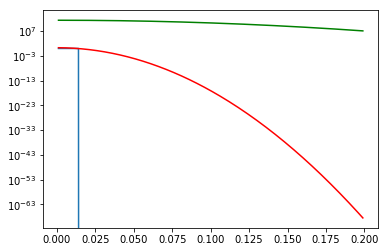

In [83]:
plot(error_in,error_out)

# Task 4 Comment

* Applying the same X and Y variables as Etivity 1 leads to Error exceeding the Hoeffding bound while not exceeding the VC Dimension while running this the VC Dimension remained linear while the hoeffding bound slowly began to drop off as it reached the sample size
* The p[(Ein-Eout)>e] remained less than 0.025
* Applying the features created such as Is_Financially_Stable, Is_Loan_Repayable (X) and leaving y the same lead to same conclusion as above
* Although the error percentage of Ein and Eout did increase from a previous ~20% to closer to ~55% with a VC Bound increase to ~60%.
* Applying PCA did not help in the case of new features only leading to an greater increase in error although results where the same as before



# Task 5

Using the dataset, make learning curves for logistic regression and two other machine learning algorithms of your choosing using scikitlearn’s learning_curve functionality. Choose one algorithm with low complexity in terms of VC dimension and one algorithm with high complexity.

Comment on what information you can derive from the learning curves  (in a markdown cell) and how this information differs between simple and complex machine learning algorithms.

In [84]:
def plot_learning_curve(estimator):
    cv=5
    n_jobs=2
    
    # Create train sizes
    # Note: The minimum train samples should also have samples of at least 2 classes in the data 
    train_sizes=np.linspace(0.1, 1.0, 5)
    print("Train sizes selected :\n", train_sizes)


    # Determine the cross-validated training and test scores for different training set sizes.
    train_sizes, train_scores, test_scores = learning_curve(estimator=estimator, 
                                                            X=X_train, 
                                                            y=y_train, 
                                                            cv=cv, 
                                                            n_jobs=n_jobs, 
                                                            train_sizes=train_sizes)
    
    print("train_scores:\n", train_scores)
    print("test_scores :\n", test_scores)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std  = np.std(train_scores, axis=1)
    test_scores_mean  = np.mean(test_scores, axis=1)
    test_scores_std   = np.std(test_scores, axis=1)

    # Extract the string value of estimator using regular expression
    estimator_string = re.sub(r" ?\([^)]+\)", "", str(estimator))
    plt.title("Learning curves of {} estimator.". format(estimator_string), fontsize = 12)
  
    plt.plot(train_sizes, train_scores_mean, 'ro--', label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'go--', label= "CV score")
    
    # Highlight the standtard deviation from mean
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, 
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.legend(loc="best")
    plt.ylabel('Score')
    plt.xlabel('Training examples')
    
    plt.grid()
    plt.ylim(0.3, 1.01)
    plt.show()

Train sizes selected :
 [0.1   0.325 0.55  0.775 1.   ]
train_scores:
 [[0.8125     0.7890625  0.7890625  0.7890625  0.7890625 ]
 [0.77644231 0.79567308 0.80288462 0.80288462 0.80288462]
 [0.76704545 0.77982955 0.77840909 0.78977273 0.78977273]
 [0.77217742 0.78729839 0.78326613 0.77520161 0.77822581]
 [0.76640625 0.778125   0.7765625  0.77109375 0.78515625]]
test_scores :
 [[0.796875 0.76875  0.765625 0.79375  0.740625]
 [0.790625 0.76875  0.76875  0.79375  0.740625]
 [0.79375  0.765625 0.765625 0.790625 0.74375 ]
 [0.8      0.765625 0.765625 0.790625 0.740625]
 [0.80625  0.76875  0.765625 0.79375  0.74375 ]]


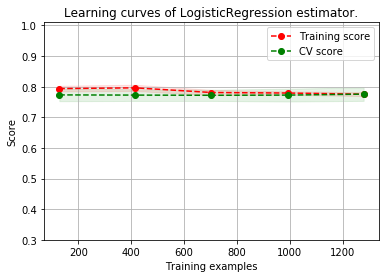

Train sizes selected :
 [0.1   0.325 0.55  0.775 1.   ]
train_scores:
 [[0.8125     0.7890625  0.7890625  0.7890625  0.7890625 ]
 [0.77644231 0.79807692 0.80288462 0.80288462 0.80288462]
 [0.76704545 0.77840909 0.77840909 0.78693182 0.78693182]
 [0.77217742 0.78729839 0.78326613 0.77520161 0.77822581]
 [0.76640625 0.778125   0.7765625  0.76796875 0.78203125]]
test_scores :
 [[0.796875 0.771875 0.759375 0.79375  0.740625]
 [0.7875   0.765625 0.765625 0.79375  0.740625]
 [0.790625 0.76875  0.765625 0.7875   0.74375 ]
 [0.796875 0.765625 0.765625 0.7875   0.74375 ]
 [0.8      0.76875  0.765625 0.790625 0.74375 ]]


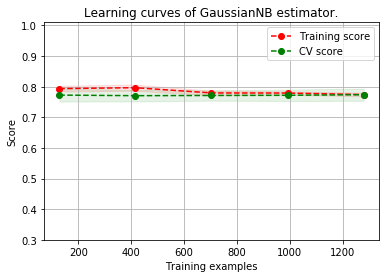

Train sizes selected :
 [0.1   0.325 0.55  0.775 1.   ]
train_scores:
 [[0.8203125  0.7890625  0.7890625  0.7890625  0.7890625 ]
 [0.77884615 0.79567308 0.80288462 0.80288462 0.80288462]
 [0.76704545 0.77840909 0.77982955 0.78693182 0.78693182]
 [0.77116935 0.78729839 0.78125    0.77520161 0.77721774]
 [0.76640625 0.778125   0.7765625  0.76953125 0.78359375]]
test_scores :
 [[0.79375  0.771875 0.7625   0.79375  0.740625]
 [0.790625 0.76875  0.76875  0.79375  0.740625]
 [0.79375  0.765625 0.765625 0.790625 0.74375 ]
 [0.796875 0.7625   0.765625 0.7875   0.740625]
 [0.80625  0.76875  0.765625 0.79375  0.74375 ]]


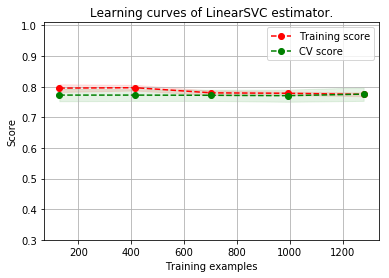

Train sizes selected :
 [0.1   0.325 0.55  0.775 1.   ]
train_scores:
 [[0.8046875  0.796875   0.796875   0.796875   0.796875  ]
 [0.76923077 0.80048077 0.80288462 0.80288462 0.80288462]
 [0.76136364 0.78551136 0.77982955 0.78977273 0.78977273]
 [0.77217742 0.78729839 0.78729839 0.77520161 0.77721774]
 [0.76484375 0.7765625  0.778125   0.76796875 0.78515625]]
test_scores :
 [[0.809375 0.771875 0.765625 0.79375  0.7375  ]
 [0.7875   0.76875  0.76875  0.796875 0.7375  ]
 [0.790625 0.76875  0.765625 0.790625 0.74375 ]
 [0.796875 0.771875 0.76875  0.7875   0.746875]
 [0.796875 0.76875  0.76875  0.7875   0.7375  ]]


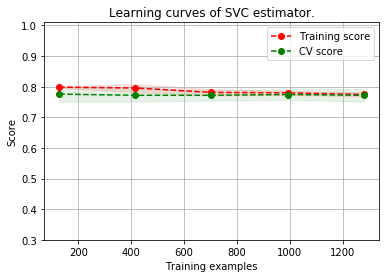

Train sizes selected :
 [0.1   0.325 0.55  0.775 1.   ]
train_scores:
 [[0.8203125  0.828125   0.828125   0.828125   0.828125  ]
 [0.81009615 0.81730769 0.82932692 0.82932692 0.82932692]
 [0.79403409 0.81960227 0.80397727 0.80823864 0.80823864]
 [0.80745968 0.81854839 0.81955645 0.80947581 0.80846774]
 [0.80234375 0.81328125 0.80703125 0.8015625  0.821875  ]]
test_scores :
 [[0.784375 0.7625   0.734375 0.771875 0.709375]
 [0.734375 0.71875  0.75     0.76875  0.69375 ]
 [0.746875 0.73125  0.7375   0.75625  0.70625 ]
 [0.75     0.74375  0.721875 0.753125 0.7125  ]
 [0.740625 0.721875 0.73125  0.775    0.70625 ]]


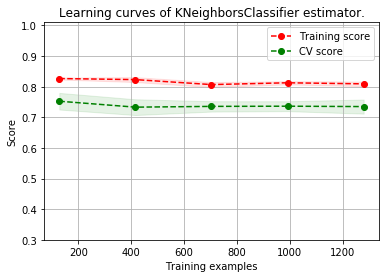

Train sizes selected :
 [0.1   0.325 0.55  0.775 1.   ]
train_scores:
 [[0.921875   0.890625   0.890625   0.890625   0.890625  ]
 [0.79326923 0.81971154 0.82211538 0.82211538 0.82211538]
 [0.77414773 0.79545455 0.79403409 0.79971591 0.79971591]
 [0.77923387 0.79637097 0.7953629  0.78427419 0.78629032]
 [0.771875   0.78203125 0.78203125 0.775      0.790625  ]]
test_scores :
 [[0.728125 0.740625 0.71875  0.746875 0.66875 ]
 [0.759375 0.75625  0.75625  0.7875   0.73125 ]
 [0.815625 0.746875 0.765625 0.7875   0.740625]
 [0.81875  0.75625  0.7625   0.796875 0.728125]
 [0.80625  0.753125 0.759375 0.79375  0.725   ]]


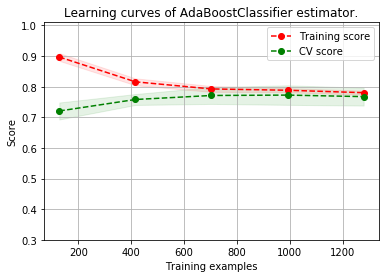

In [85]:
estimators = [LogisticRegression(), GaussianNB(), LinearSVC(), SVC(kernel='rbf'),KNeighborsClassifier(),AdaBoostClassifier()]

# Run the test for learning curve
for e in estimators:
    plot_learning_curve(e)

In [86]:
def plot_confusion(cm_result, labels , title):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm_result)
    plt.title(title)
    fig.colorbar(cax)
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# SVC Linear

In [87]:
svclassifier = LinearSVC() 
svclassifier.fit(X_train, y_train) 

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [88]:
y_pred = svclassifier.predict(X_test) 

In [89]:
print(metrics.accuracy_score(y_test, y_pred))
cm_result = metrics.confusion_matrix(y_test, y_pred)

0.7875


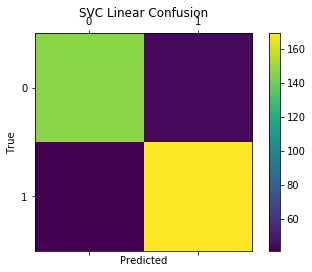

In [90]:
plot_confusion(cm_result,y_pred, 'SVC Linear Confusion')

In [91]:
Ein = 1 - svclassifier.score(X_train, y_train)
print("Ein:", Ein)

Eout = 1 - svclassifier.score(X_test, y_test)
print("Eout:", Eout)

Ein: 0.224375
Eout: 0.21250000000000002


# K nearest neighbours 

In [92]:
kneighbours_classifier = KNeighborsClassifier()
kneighbours_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [93]:
y_kneighbourspred = kneighbours_classifier.predict(X_test) 

In [94]:
print(metrics.accuracy_score(y_test, y_kneighbourspred))
knn_cm = metrics.confusion_matrix(y_test, y_kneighbourspred)

0.745


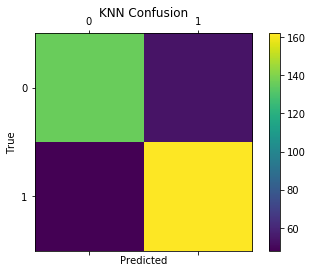

In [95]:
plot_confusion(knn_cm,y_kneighbourspred, 'KNN Confusion')

In [96]:
Ein = 1 - kneighbours_classifier.score(X_train, y_train)
print("Ein:", Ein)

Eout = 1 - kneighbours_classifier.score(X_test, y_test)
print("Eout:", Eout)

Ein: 0.193125
Eout: 0.255


# Adaboost Classifier

In [97]:
adaboost_classifier = AdaBoostClassifier()

In [98]:
adaboost_classifier.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [99]:
y_adaboostpred = adaboost_classifier.predict(X_test) 

In [100]:
print(metrics.accuracy_score(y_test, y_adaboostpred))
ada_cm = metrics.confusion_matrix(y_test, y_adaboostpred)

0.7925


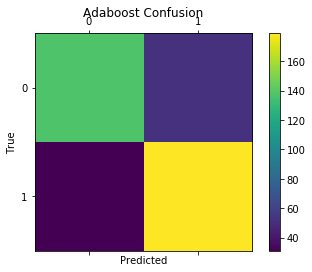

In [101]:
plot_confusion(ada_cm,y_adaboostpred, 'Adaboost Confusion')

In [102]:
Ein = 1 - adaboost_classifier.score(X_train, y_train)
print("Ein:", Ein)

Eout = 1 - adaboost_classifier.score(X_test, y_test)
print("Eout:", Eout)

Ein: 0.22124999999999995
Eout: 0.20750000000000002


# Task 5 Comment

* Applying logistic regression lead to both scores being in parallel with no major difference in Training score and CV Score as they seemed to be tightly coupled.
* The same can be siad also for GaussianNB, LinearSVC, SVC.
* In comparision with more complex algorithms such as KNN and Adaboost(ensemble) there is a more of a difference in Ein and Eout
* With KNN Eout being at least less than ~10% behind Training score at staying at ~80% and Adaboost leads to converge at 700 samples with Training score starting at .9 and CV Score starting at .7 and reaching final convergence at ~77%.
* These gap that is displayed in the last two graphs shows that more samples in order to bring it to a better convergence


* [1] [Outliner Detection] (http://colingorrie.github.io/outlier-detection.html)
* [2] [Feature Engineering] (https://jakevdp.github.io/PythonDataScienceHandbook/05.04-feature-engineering.html)
* [3] [Learning Curve] (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html)
* [4] [Learning Curve Plotting] (https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py)
* [5] [Art of Feature Engineering for Data Science - Nabeel Sarwar] (https://www.youtube.com/watch?v=leTyvBPhYzw)
* [6] [Feature Engineering with H2O - Dmitry Larko, Senior Data Scientist, H2O.ai] [https://www.youtube.com/watch?v=irkV4sYExX4]

Herzallah, W., Faris, H. and Adwan, O. (2018) ‘Feature engineering for detecting spammers on Twitter: Modelling and analysis’, Journal of Information Science, 44(2), pp. 230–247. doi: 10.1177/0165551516684296.